Nama: Rahmat Hidayat

Email: mc013d5y1559@student.devacademy.id

ID Dicoding: MC013D5Y1559

# Impor packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
os.getcwd()

'/content'

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Memuat Dataset

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/customer_feedback_satisfaction.csv')
df

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.00
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.00
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.00
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.00
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.00
...,...,...,...,...,...,...,...,...,...,...,...
38439,38440,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,38441,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,38442,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,38443,28,Female,USA,105587,7,5,16,High,Silver,100.00


# Assessing Data

**Memeriksa tipe data**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


**Memeriksa duplikasi data**

In [14]:
# Menghitung & Menampilkan jumlah baris dengan duplikasi values
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Memeriksa missing values**

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64


<Axes: >

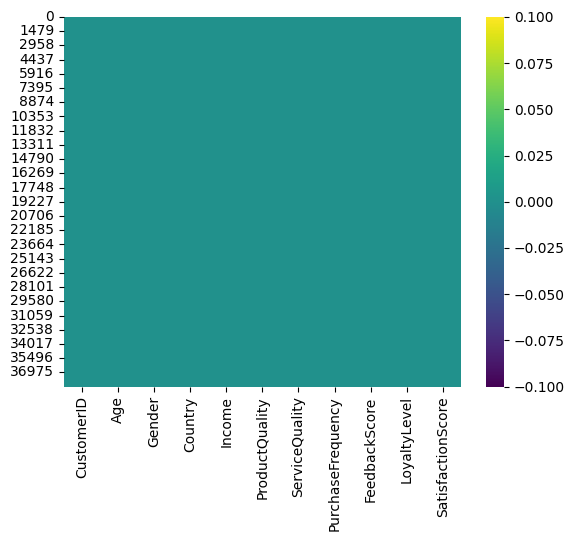

In [15]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cmap='viridis')

**Memeriksa parameter statistik dari kolom numerik**

In [16]:
df.describe()

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


# Data Cleansing

**mengkonversi customer_id menjadi string**

In [17]:
df['CustomerID'] = df['CustomerID'].astype(str)

**Mendeteksi dan mengatasi outliers (contoh dengan Z-Score)**

In [18]:
# Mendeteksi dan mengatasi outliers (contoh dengan Z-Score)
from scipy import stats
z_scores = stats.zscore(df[['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency', 'SatisfactionScore']])
df = df[(z_scores < 3).all(axis=1)]  # Menghapus data dengan Z-Score lebih dari 3

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  object 
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 3.2+ MB


# Penambahan Variabel Relevan

**Segmentasi umur**

In [20]:
def age_segment(age):
    if age < 20:
        return 'Teen (<20)'
    elif 20 <= age < 30:
        return 'Young Adult (<=20 to <30)'
    elif 30 <= age < 40:
        return 'Adult (<=30 to <40)'
    elif 40 <= age < 50:
        return 'Middle Age ( <=40 to <50)'
    elif 50 <= age < 60:
        return 'Senior (<=50 to <60)'
    else:
        return 'Elderly (>60)'

# Menambahkan kolom 'AgeSegment' ke dalam dataframe
df['AgeSegment'] = df['Age'].apply(age_segment)

**Segmentasi pelanggan**

In [21]:
# Menentukan Segmen Berdasarkan Loyalitas dan Kepuasan
def segment_customer(row):
    if row['LoyaltyLevel'] == 'Gold' and row['SatisfactionScore'] >= 90:
        return 'VIP'
    elif row['LoyaltyLevel'] in ['Silver', 'Gold'] and row['SatisfactionScore'] >= 75:
        return 'Loyal'
    elif row['SatisfactionScore'] < 50:
        return 'At Risk'
    else:
        return 'Regular'

df['Segment'] = df.apply(segment_customer, axis=1)
df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore,AgeSegment,Segment
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0,Senior (<=50 to <60),Regular
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0,Elderly (>60),VIP
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0,Middle Age ( <=40 to <50),Loyal
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0,Adult (<=30 to <40),VIP
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0,Elderly (>60),Regular


# Analisis Data

In [22]:
# Menghitung jumlah pelanggan di setiap negara berdasarkan segmen
pivot_table = df.pivot_table(index='Country', columns=['Segment'], values='CustomerID', aggfunc='count', fill_value=0)
print(pivot_table)

Segment  At Risk  Loyal  Regular   VIP
Country                               
Canada       320   2540     3515  1318
France       334   2531     3475  1367
Germany      347   2448     3556  1303
UK           320   2434     3570  1304
USA          324   2447     3629  1362


In [23]:
# Menghitung jumlah pelanggan di setiap negara berdasarkan gender
pivot_table = df.pivot_table(index='Gender', columns='Segment', values='CustomerID', aggfunc='count', fill_value=0)
print(pivot_table)

Segment  At Risk  Loyal  Regular   VIP
Gender                                
Female       803   6238     8863  3390
Male         842   6162     8882  3264


In [24]:
# Menghitung jumlah pelanggan di setiap negara berdasarkan AgeSegment
pivot_table = df.pivot_table(index='AgeSegment', columns='Segment', values='CustomerID', aggfunc='count', fill_value=0)
print(pivot_table)

Segment                    At Risk  Loyal  Regular   VIP
AgeSegment                                              
Adult (<=30 to <40)            422   2456     3518  1248
Elderly (>60)                  126   2503     3291  1464
Middle Age ( <=40 to <50)      290   2334     3421  1308
Senior (<=50 to <60)           211   2417     3332  1403
Teen (<20)                     113    412      705   213
Young Adult (<=20 to <30)      483   2278     3478  1018


      CustomerID LoyaltyLevel  SatisfactionScore  Segment
0              1       Bronze             100.00  Regular
1              2         Gold             100.00      VIP
2              3       Silver             100.00    Loyal
3              4         Gold             100.00      VIP
4              5       Bronze              82.00  Regular
...          ...          ...                ...      ...
38439      38440       Silver              75.85    Loyal
38440      38441       Silver             100.00    Loyal
38441      38442       Bronze             100.00  Regular
38442      38443       Silver             100.00    Loyal
38443      38444       Bronze              71.81  Regular

[38444 rows x 4 columns]


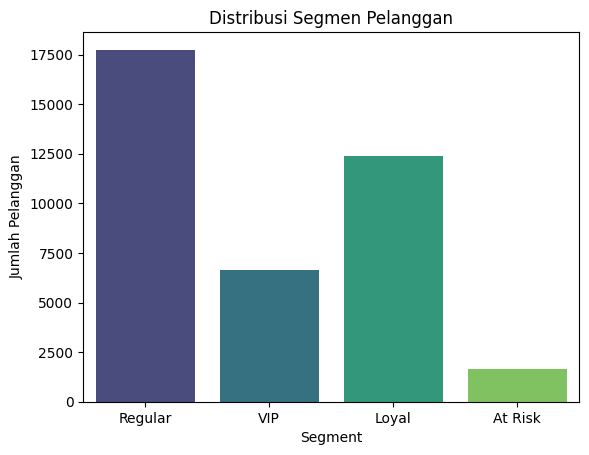

Segment
Regular    17745
Loyal      12400
VIP         6654
At Risk     1645
Name: count, dtype: int64


In [25]:
# Melihat Distribusi Segmen
print(df[['CustomerID', 'LoyaltyLevel', 'SatisfactionScore', 'Segment']])

# Visualisasi Segmentasi Pelanggan
sns.countplot(data=df, x='Segment', palette='viridis')
plt.title('Distribusi Segmen Pelanggan')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Menghitung jumlah pelanggan di setiap segmen
segment_counts = df['Segment'].value_counts()
print(segment_counts)

### Insight :

1. **Segmentasi Berdasarkan Negara**:
   - **USA, UK, dan Germany** memiliki jumlah pelanggan tertinggi di segmen Regular. Ini menunjukkan bahwa banyak pelanggan di negara-negara ini berada dalam kategori kepuasan dan loyalitas yang sedang.
   - **France dan USA** memiliki jumlah pelanggan VIP tertinggi, menunjukkan bahwa ada tingkat loyalitas dan kepuasan yang tinggi di negara-negara ini.
   - **Germany dan France** memiliki jumlah pelanggan At Risk yang relatif tinggi, yang perlu perhatian khusus untuk mengurangi churn.

2. **Segmentasi Berdasarkan Gender**:
   - Distribusi pelanggan di setiap segmen sangat mirip antara laki-laki dan perempuan. Namun, ada sedikit perbedaan dengan pelanggan perempuan lebih banyak berada di segmen VIP dibandingkan pelanggan laki-laki.
   - Pelanggan At Risk sedikit lebih banyak terdiri dari laki-laki, yang menunjukkan kebutuhan untuk fokus pada peningkatan kepuasan dan loyalitas di kalangan pelanggan laki-laki.

3. **Segmentasi Berdasarkan Umur**:
   - **Young Adult** dan **Adult** memiliki jumlah tertinggi di segmen At Risk. Ini menunjukkan bahwa pelanggan dalam rentang usia ini memerlukan perhatian khusus untuk meningkatkan kepuasan dan loyalitas mereka.
   - **Elderly** memiliki jumlah pelanggan tertinggi di segmen Loyal dan VIP. Ini menunjukkan bahwa pelanggan yang lebih tua cenderung lebih setia dan puas dengan produk atau layanan.
   - Pelanggan remaja (<20) memiliki jumlah terendah di semua segmen, terutama di segmen Loyal dan VIP. Ini menunjukkan bahwa pelanggan remaja mungkin memerlukan pendekatan yang berbeda untuk meningkatkan kepuasan dan loyalitas mereka.

### Strategi untuk Segmen Pelanggan

#### Segmen At Risk
1. **Personalized Communication**: Kirim email atau pesan yang dipersonalisasi untuk mengidentifikasi masalah yang mungkin dihadapi pelanggan dan tawarkan solusi.
2. **Incentives and Promotions**: Berikan diskon, penawaran khusus, atau insentif lainnya untuk menarik kembali minat pelanggan dalam membeli produk atau menggunakan layanan.
3. **Enhanced Customer Support**: Sediakan dukungan pelanggan yang lebih responsif dan proaktif untuk menangani masalah atau keluhan dengan cepat.

#### Segmen Loyal
1. **Loyalty Programs**: Perkuat program loyalitas dengan menambahkan lebih banyak hadiah atau manfaat eksklusif untuk pelanggan setia.
2. **Customer Referral Program**: Dorong pelanggan loyal untuk mereferensikan teman atau keluarga dengan memberikan insentif seperti diskon atau hadiah.
3. **Exclusive Previews and Offers**: Tawarkan akses eksklusif ke produk baru, acara khusus, atau penawaran hanya untuk pelanggan setia.

#### Segmen Regular
1. **Personalized Recommendations**: Gunakan data historis untuk memberikan rekomendasi produk yang sesuai dengan preferensi pelanggan.
2. **Engagement Campaigns**: Buat kampanye pemasaran yang interaktif dan menarik untuk meningkatkan keterlibatan pelanggan, seperti kontes atau quiz online.
3. **Feedback Solicitation**: Minta umpan balik dari pelanggan tentang bagaimana meningkatkan produk atau layanan, dan tunjukkan bahwa umpan balik mereka diperhatikan.

#### Segmen VIP
1. **Exclusive Events**: Undang pelanggan VIP ke acara eksklusif atau peluncuran produk khusus untuk membuat mereka merasa istimewa.
2. **Premium Services**: Tawarkan layanan premium seperti layanan pelanggan khusus, pengiriman lebih cepat, atau produk yang dipersonalisasi.
3. **Special Recognition**: Berikan pengakuan khusus kepada pelanggan VIP melalui program penghargaan atau sebutkan di media sosial.

### Strategi Berdasarkan Demografi

#### Berdasarkan Gender
1. **Tailored Content**: Buat konten pemasaran yang disesuaikan dengan preferensi dan minat khusus dari masing-masing gender.
2. **Segmented Campaigns**: Jalankan kampanye pemasaran yang tersegmentasi untuk menargetkan kebutuhan dan preferensi unik dari pelanggan laki-laki dan perempuan.

#### Berdasarkan Umur
1. **Age-Appropriate Marketing**: Gunakan pendekatan pemasaran yang sesuai dengan berbagai kelompok umur, seperti bahasa, media, dan jenis penawaran yang relevan.
2. **Lifecycle Campaigns**: Buat kampanye yang mengikuti perjalanan hidup pelanggan, seperti penawaran khusus untuk ulang tahun, pernikahan, atau pensiun.

### Strategi Berdasarkan Negara
1. **Localized Marketing**: Sesuaikan kampanye pemasaran dengan budaya, bahasa, dan preferensi lokal dari setiap negara.
2. **Country-Specific Offers**: Tawarkan penawaran khusus yang relevan dengan pasar lokal, seperti diskon untuk hari libur nasional atau produk yang populer di negara tersebut.